In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pmdarima import auto_arima
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('./Data/EnergyProduction.csv', index_col='DATE', parse_dates=True)

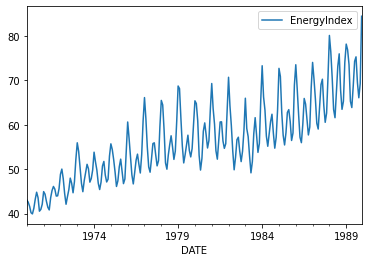

In [6]:
df.plot();

In [7]:
len(df)

240

In [8]:
n_obs = 24

# Exponential Smooting

In [19]:
train_data = df.iloc[:-n_obs]
test_data = df.iloc[-n_obs:]

In [22]:
print(train_data.shape, test_data.shape)

(216, 1) (24, 1)


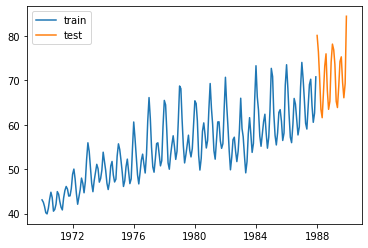

In [25]:
plt.plot(train_data, label='train')
plt.plot(test_data, label='test')
plt.legend()
plt.show()

In [36]:
def exp_smoothing(train_data, trend, seasonal, test_data = test_data):
    fitted_model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal,
                                       seasonal_periods=12).fit()
    test_predictions = fitted_model.forecast(24)
    plt.figure(figsize=(12,5))
    plt.plot(test_data, label='test')
    plt.plot(test_predictions, label='prediction')
    
    mae = mean_absolute_error(test_data, test_predictions)
    mse = mean_squared_error(test_data, test_predictions)
    rmse = np.sqrt(mse)
    
    print('mae :', mae)
    print('mse :', mse)
    print('rmse :', rmse)

mae : 2.7145989390490537
mse : 11.860913777946623
rmse : 3.443967737646017


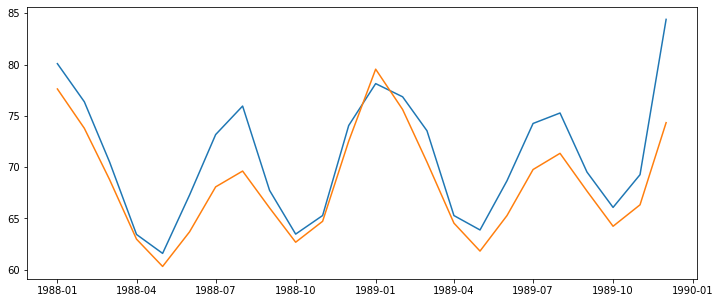

In [39]:
exp_smoothing(train_data, 'mul', 'mul')

mae : 2.768300423888428
mse : 11.775533525016849
rmse : 3.43154972643802


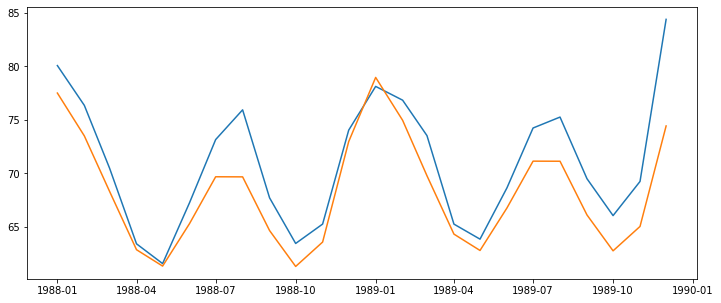

In [42]:
exp_smoothing(train_data, 'add','add')

In [44]:
final_model = ExponentialSmoothing(df, trend='add',seasonal='add',
                                  seasonal_periods=12).fit()

In [45]:
forecast_prediction = final_model.forecast(36)

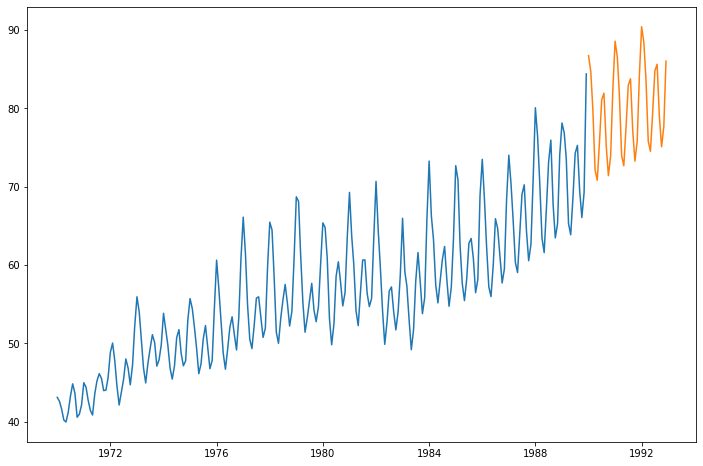

In [46]:
plt.figure(figsize=(12,8))
plt.plot(df)
plt.plot(forecast_prediction)
plt.show()

# ARIMA

In [52]:
from statsmodels.tsa.stattools import adfuller
from pmdarima import auto_arima

from statsmodels.tsa.arima_model import ARIMA, ARIMAResults
from statsmodels.tsa.statespace.sarimax import SARIMAX, SARIMAXResults
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.tools import diff
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tools.eval_measures import rmse

In [48]:
result = seasonal_decompose(df, model='add')

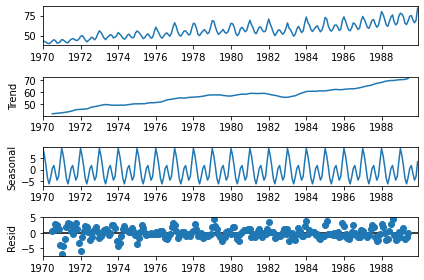

In [50]:
result.plot();

In [54]:
adfuller(df)[1]

0.9830559056338348

In [57]:
df_diff = df.diff().dropna()

In [63]:
adfuller(df_diff)[1]

4.226559012395704e-06

In [65]:
stepwise_fit = auto_arima(df, seasonal=True, trace=True, m=12)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=842.617, Time=1.00 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1055.546, Time=0.01 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=855.182, Time=0.15 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=909.065, Time=0.11 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1134.429, Time=0.01 sec
 ARIMA(2,0,2)(0,1,1)[12] intercept   : AIC=840.759, Time=0.70 sec
 ARIMA(2,0,2)(0,1,0)[12] intercept   : AIC=881.557, Time=0.19 sec
 ARIMA(2,0,2)(0,1,2)[12] intercept   : AIC=842.577, Time=1.42 sec
 ARIMA(2,0,2)(1,1,0)[12] intercept   : AIC=855.194, Time=0.43 sec
 ARIMA(2,0,2)(1,1,2)[12] intercept   : AIC=844.166, Time=1.83 sec
 ARIMA(1,0,2)(0,1,1)[12] intercept   : AIC=841.937, Time=0.28 sec
 ARIMA(2,0,1)(0,1,1)[12] intercept   : AIC=843.582, Time=0.38 sec
 ARIMA(3,0,2)(0,1,1)[12] intercept   : AIC=842.514, Time=0.90 sec
 ARIMA(2,0,3)(0,1,1)[12] intercept   : AIC=842.693, Time=0.94 sec
 ARIMA(1,0,1)(0,1,1)[12] interc

In [68]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  240
Model:             SARIMAX(3, 0, 1)x(0, 1, 1, 12)   Log Likelihood                -413.258
Date:                            Sun, 23 May 2021   AIC                            840.516
Time:                                    23:55:22   BIC                            864.522
Sample:                                         0   HQIC                           850.202
                                            - 240                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0475      0.046      1.044      0.296      -0.042       0.137
ar.L1          1.6309      0.166      9.801      0.000       1.305       1.957
ar.L2         -0.8739      0.155     -5.640      0.000      -1.178      -0.570
ar.L3          0.2156      0.091      2.376      0.017       0.038       0.394
ma.L1         -0.7385      0.174     -4.248      0.000      -1.079      -0.398
ma.S.L12      -0.5458      0.059     -9.265      0.000      -0.661      -0.430
sigma2         2.1498      0.148     14.512      0.000       1.859       2.440
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                64.01
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               2.07   Skew:                             0.44
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [70]:
model = SARIMAX(train_data, order=(3,0,1), seasonal_order=(0,1,1,12))

In [71]:
results = model.fit()

In [72]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                        EnergyIndex   No. Observations:                  216
Model:             SARIMAX(3, 0, 1)x(0, 1, 1, 12)   Log Likelihood                -359.115
Date:                            Sun, 23 May 2021   AIC                            730.230
Time:                                    23:56:54   BIC                            750.138
Sample:                                01-01-1970   HQIC                           738.283
                                     - 12-01-1987                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.7745      0.095     18.622      0.000       1.588       1.961
ar.L2         -0.9883      0.113     -8.780      0.000      -1.209      -0.768
ar.L3          0.2111      0.076      2.778      0.005       0.062       0.360
ma.L1         -0.8565      0.080    -10.649      0.000      -1.014      -0.699
ma.S.L12      -0.5650      0.053    -10.651      0.000      -0.669      -0.461
sigma2         1.9217      0.168     11.414      0.000       1.592       2.252
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 9.10
Prob(Q):                              0.92   Prob(JB):                         0.01
Heteroskedasticity (H):               2.05   Skew:                             0.10
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [73]:
start = len(train_data)
end = len(train_data) + len(test_data) - 1

In [74]:
pred = results.predict(start, end, typ='level')

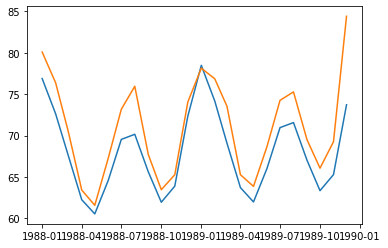

In [76]:
plt.plot(pred)
plt.plot(test_data)
plt.show()

In [77]:
error = rmse(test_data, pred)
error

array([ 8.31981553,  6.09823958,  6.79366971, 10.53638173, 11.99706146,
        8.69493785,  6.05820751,  5.93929791,  7.96124573, 10.79105154,
        9.2213997 ,  6.03056639,  9.51428606,  6.67546108,  6.18212862,
        9.35946757, 10.76244513,  7.70125307,  5.87907598,  5.9064441 ,
        7.08999389,  9.6500675 ,  8.20025993,  6.47869886])

In [78]:
model = SARIMAX(df, order=(3,0,1), seasonal_order=(0,1,1,12))

In [79]:
results = model.fit()

In [80]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                        EnergyIndex   No. Observations:                  240
Model:             SARIMAX(3, 0, 1)x(0, 1, 1, 12)   Log Likelihood                -415.510
Date:                            Sun, 23 May 2021   AIC                            843.021
Time:                                    23:58:43   BIC                            863.597
Sample:                                01-01-1970   HQIC                           851.322
                                     - 12-01-1989                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.7509      0.094     18.681      0.000       1.567       1.935
ar.L2         -0.9646      0.117     -8.235      0.000      -1.194      -0.735
ar.L3          0.2119      0.084      2.523      0.012       0.047       0.377
ma.L1         -0.8439      0.084    -10.022      0.000      -1.009      -0.679
ma.S.L12      -0.5587      0.057     -9.876      0.000      -0.670      -0.448
sigma2         2.1795      0.153     14.279      0.000       1.880       2.479
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                49.80
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               2.08   Skew:                             0.40
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [81]:
forecast = results.predict(len(df)-1, len(df)+11, typ='levels')

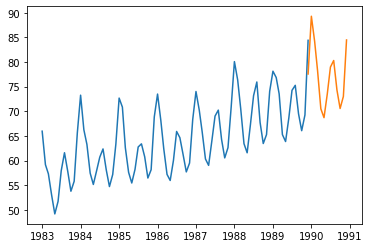

In [88]:
plt.plot(df['1983-01-01':])
plt.plot(forecast)

# LSTM

In [9]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, LSTM, Input

In [10]:
nobs = 12

In [11]:
train = df.iloc[:-nobs]
test = df.iloc[-nobs:]

In [12]:
mm_scaler = MinMaxScaler()
st_scaler = StandardScaler()

In [13]:
mm_scaler.fit(train)
st_scaler.fit(train)

StandardScaler()

In [14]:
mm_scaled_train = mm_scaler.transform(train)
mm_scaled_test = mm_scaler.transform(test)
st_scaled_train = st_scaler.transform(train)
st_scaled_test = st_scaler.transform(test)

In [15]:
n_input = 12
n_features = 1

In [16]:
mm_gen = TimeseriesGenerator(mm_scaled_train, mm_scaled_train, length=n_input,
                         batch_size=1)
st_gen = TimeseriesGenerator(st_scaled_train, st_scaled_train, length=n_input,
                         batch_size=1)

In [17]:
inputs = Input(shape=(n_input, n_features))
x = LSTM(100, activation='relu')(inputs)
x = Dense(1)(x)

In [21]:
mm_model = Model(inputs, x)
st_model = Model(inputs, x)

In [22]:
mm_model.compile(optimizer='adam', loss='mse')
st_model.compile(optimizer='adam', loss='mse')

In [23]:
mm_hist = mm_model.fit_generator(mm_gen, epochs=50, verbose=0)
st_hist = st_model.fit_generator(st_gen, epochs=50, verbose=0)

Instructions for updating:
Please use Model.fit, which supports generators.


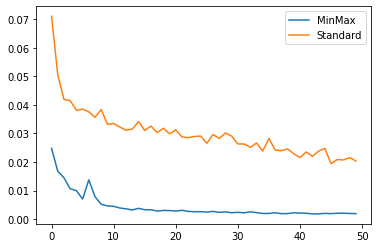

In [27]:
plt.plot(mm_hist.history['loss'], label='MinMax')
plt.plot(st_hist.history['loss'], label='Standard')
plt.legend()
plt.show()

In [28]:
first_eval_batch = mm_scaled_train[-12:]
first_eval_batch = first_eval_batch.reshape((1, n_input, n_features))

In [30]:
mm_model.predict(first_eval_batch)

array([[1.1262071]], dtype=float32)

In [39]:
test_predictions = []
first_eval_batch = mm_scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

In [40]:
for i in range(len(test)):
    current_pred = model.predict(current_batch)[0]
    test_predictions.append(current_pred)
    current_batch = np.append(current_batch[:, 1:, :], [[current_pred]], axis=1)

In [41]:
test_predictions

[array([1.1262071], dtype=float32),
 array([1.117718], dtype=float32),
 array([0.83300537], dtype=float32),
 array([0.5422754], dtype=float32),
 array([0.5601636], dtype=float32),
 array([0.8953703], dtype=float32),
 array([1.2141159], dtype=float32),
 array([1.146272], dtype=float32),
 array([0.80624], dtype=float32),
 array([0.52206135], dtype=float32),
 array([0.63773364], dtype=float32),
 array([1.1513337], dtype=float32)]

In [42]:
true_predictions = mm_scaler.inverse_transform(test_predictions)

In [43]:
test['predictions'] = true_predictions

<AxesSubplot:xlabel='DATE'>

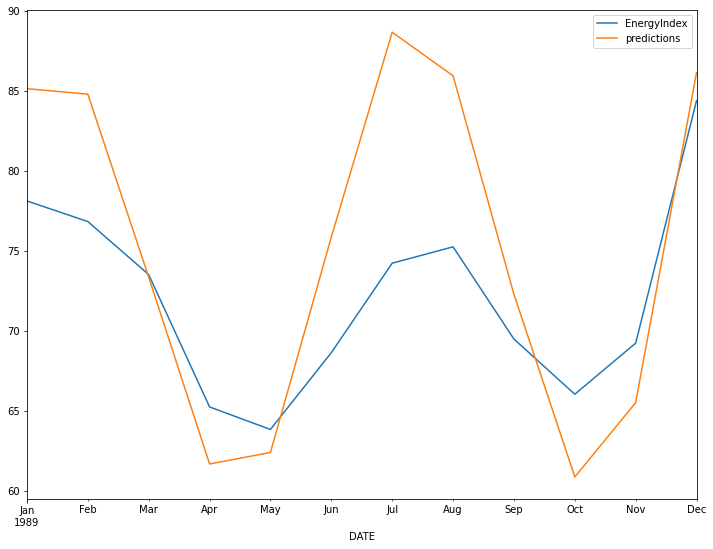

In [48]:
test.plot(figsize=(12,9))

In [53]:
print(rmse(test['EnergyIndex'], test['predictions']))

6.790834064681344
